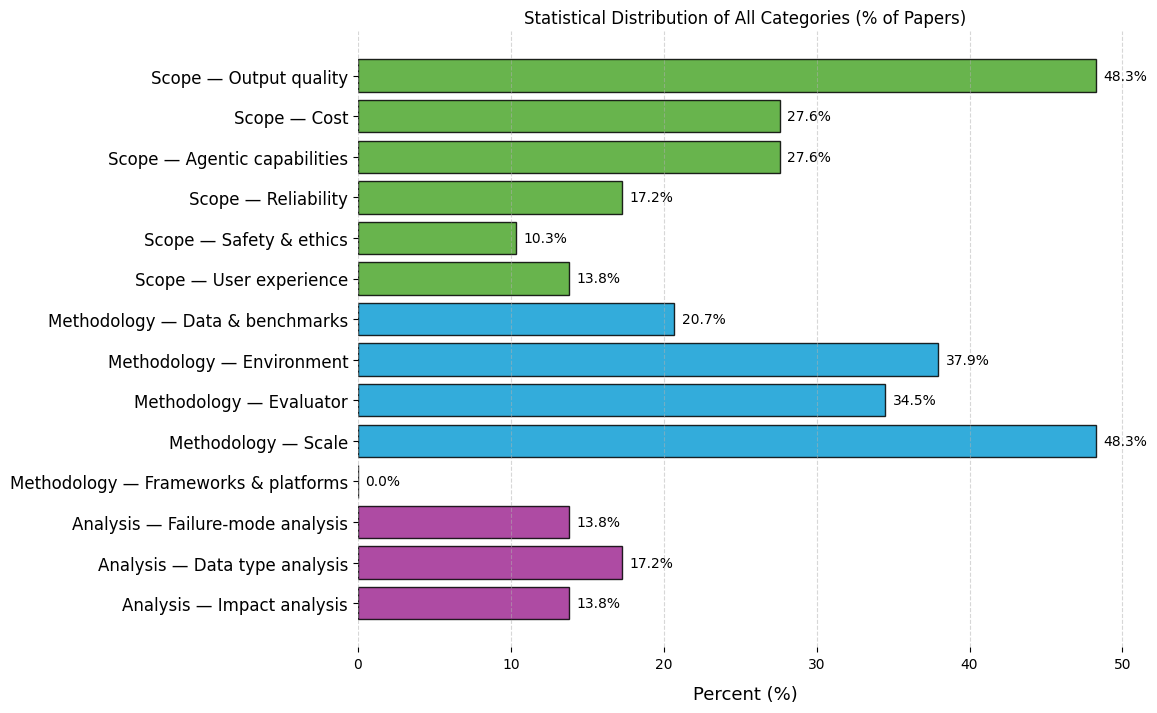

In [46]:
import matplotlib.pyplot as plt

scope = {
    "Output quality": {14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27},
    "Cost": {14, 16, 22, 27, 28, 29, 30, 31},
    "Agentic capabilities": {14, 16, 20, 24, 28, 29, 31, 32},
    "Reliability": {15, 17, 31, 33, 34},
    "Safety & ethics": {24, 30, 35},
    "User experience": {17, 28, 31, 36},
}

methodology = {
    "Data & benchmarks": {14, 18, 19, 20, 24, 37},
    "Environment": {16, 18, 21, 26, 31, 32, 33, 38, 39, 40, 41},
    "Evaluator": {14, 17, 19, 28, 29, 30, 31, 36, 40, 42},
    "Scale": {17, 18, 19, 20, 23, 24, 25, 30, 31, 33, 37, 39, 40, 41},
    "Frameworks & platforms": {},
}

analysis = {
    "Failure-mode analysis": {14, 17, 21, 33},
    "Data type analysis": {14, 15, 17, 31, 39},
    "Impact analysis": {30, 31, 38, 40},
}

def labeled_items(section_name, d):
    for k, v in d.items():
        yield f"{section_name} — {k}", set(v)

items = []
items += list(labeled_items("Scope", scope))
items += list(labeled_items("Methodology", methodology))
items += list(labeled_items("Analysis", analysis))

denom = len(set().union(*scope.values(), *methodology.values(), *analysis.values()))

data = []
for label, refs in items:
    pct = (len(refs) / denom) * 100.0 if denom else 0.0
    data.append((label, pct))

# data.sort(key=lambda t: t[1])
data = data[::-1]  # reverse original order

labels = [t[0] for t in data]
percents = [t[1] for t in data]

fig = plt.figure(figsize=(10, max(4, 0.5*len(labels) + 1)))
y = range(len(labels))
plt.yticks(y, labels, fontsize=12)
plt.xlabel("Percent (%)", fontsize=13, labelpad=10)
plt.title("Statistical Distribution of All Categories (% of Papers)")

# Annotate bars with values
for yi, val in zip(y, percents):
    plt.text(val + 0.5, yi, f"{val:.1f}%", va="center")


# Beautify the plot
plt.grid(axis='x', linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Assign colors by section
section_colors = {
    "Scope": "#4EA72E",        # blue
    "Methodology": "#0F9ED5",  # amber
    "Analysis": "#A02B93",     # green
}
bar_colors = []
for label in labels:
    if label.startswith("Scope"):
        bar_colors.append(section_colors["Scope"])
    elif label.startswith("Methodology"):
        bar_colors.append(section_colors["Methodology"])
    elif label.startswith("Analysis"):
        bar_colors.append(section_colors["Analysis"])
    else:
        bar_colors.append("#cccccc")  # fallback

plt.barh(y, percents, color=bar_colors, edgecolor='black', alpha=0.85)


plt.savefig("overall_percent_of_total.png", dpi=300, bbox_inches="tight")

